# Title: Exploratory Analysis and Price Prediction on Avocado data

# Notebook Author : Maryam Oyeyiola
Github : https://github.com/Olatohun

This notebook explores the avocado sales data from 2015 to 2018, and answer questions such as

a) The cities with the least most avocado sold

b) Average avocado sales per year

In [1]:
# importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder

# Data Exploration

In [2]:
df = pd.read_csv('avocado.csv')

In [3]:
df.shape

(18249, 14)

In [4]:
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [5]:
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [6]:
df.head(2)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany


In [7]:
df=df.drop('Unnamed: 0', axis=1)

In [8]:
df.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

In [9]:
df.head(10)

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
5,2015-11-22,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.0,conventional,2015,Albany
6,2015-11-15,0.99,83453.76,1368.92,73672.72,93.26,8318.86,8196.81,122.05,0.0,conventional,2015,Albany
7,2015-11-08,0.98,109428.33,703.75,101815.36,80.00,6829.22,6266.85,562.37,0.0,conventional,2015,Albany
8,2015-11-01,1.02,99811.42,1022.15,87315.57,85.34,11388.36,11104.53,283.83,0.0,conventional,2015,Albany
9,2015-10-25,1.07,74338.76,842.40,64757.44,113.00,8625.92,8061.47,564.45,0.0,conventional,2015,Albany


In [10]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [11]:
df.dtypes

Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

In [12]:
df.type.value_counts()

conventional    9126
organic         9123
Name: type, dtype: int64

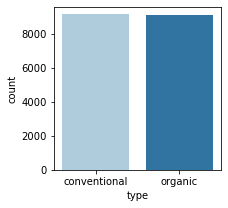

In [13]:
plt.figure(figsize=(3,3))
sns.countplot(df['type'], palette ='Paired')
plt.show()

In [14]:
df.region.value_counts()

Albany                 338
Sacramento             338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland               338
RaleighGreensboro      338
RichmondNorfolk        338
Roanoke                338
SanDiego               338
Atlanta                338
SanFrancisco           338
Seattle                338
SouthCarolina          338
SouthCentral           338
Southeast              338
Spokane                338
StLouis                338
Syracuse               338
Tampa                  338
TotalUS                338
West                   338
NewYork                338
NewOrleansMobile       338
Nashville              338
Midsouth               338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              338
Chicago                338
C

In [15]:
df.region.nunique()

54

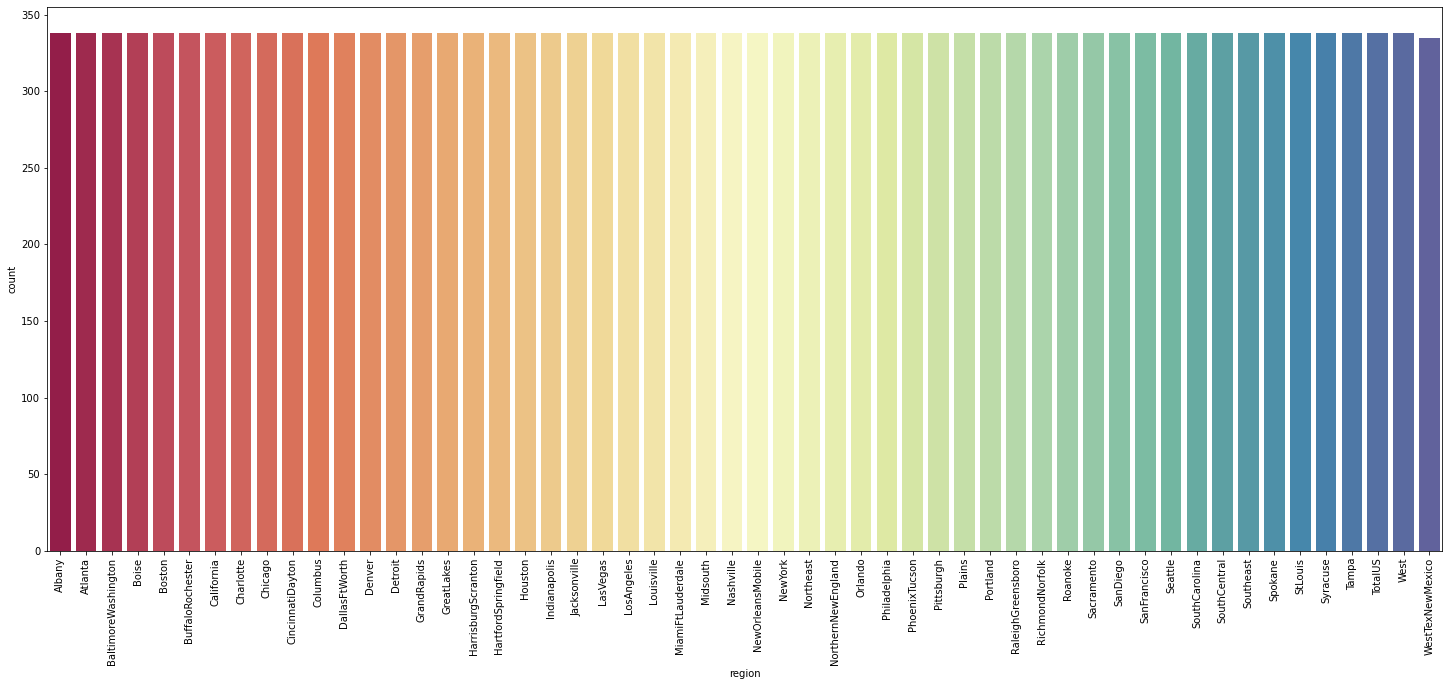

In [16]:
plt.figure(figsize=(25,10))
sns.countplot(df['region'], palette ='Spectral')
plt.xticks(rotation=90)
plt.show()

In [17]:
# total volumes sold in each city
city_sales = df.groupby('region')['Total Volume'].sum().sort_values()

In [18]:
city_sales

region
Syracuse               1.094267e+07
Boise                  1.441319e+07
Spokane                1.556528e+07
Albany                 1.606780e+07
Louisville             1.609700e+07
Pittsburgh             1.880635e+07
BuffaloRochester       2.296247e+07
Roanoke                2.504201e+07
Jacksonville           2.879000e+07
Columbus               2.999336e+07
GrandRapids            3.021174e+07
Indianapolis           3.026339e+07
StLouis                3.207283e+07
Charlotte              3.555554e+07
Nashville              3.561209e+07
HarrisburgScranton     4.180886e+07
RichmondNorfolk        4.223085e+07
CincinnatiDayton       4.452201e+07
NewOrleansMobile       4.569514e+07
RaleighGreensboro      4.820273e+07
HartfordSpringfield    5.067054e+07
LasVegas               5.437691e+07
Orlando                5.866070e+07
SouthCarolina          6.075377e+07
Detroit                6.342242e+07
Tampa                  6.600454e+07
NorthernNewEngland     7.153289e+07
Philadelphia         

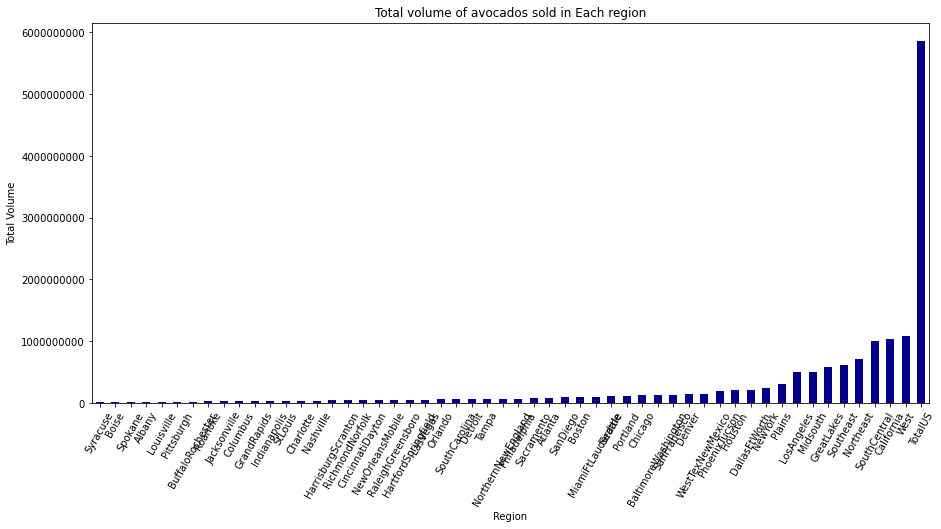

In [19]:
city_sales.plot(kind='bar', figsize=(15,7), color='#00008B', 
                title='Total volume of avocados sold in Each region',
                xlabel='Region', ylabel='Total Volume')
plt.ticklabel_format(useOffset=False, style='plain', axis='y')
plt.xticks(rotation=60)
plt.show()

"Total US" is a value for the gross total of avocado volume sold. 

In [20]:
print('The region with the highest volumes sold is {region}, with a total of {t} volumes'
      .format(region=city_sales.index[-2],t=city_sales.values[-2]))
      
print('The region with the lowest volumes sold is {region}, with a total of {t} volumes'
      .format(region=city_sales.index[0],t=city_sales.values[0]))

The region with the highest volumes sold is West, with a total of 1086779155.75 volumes
The region with the lowest volumes sold is Syracuse, with a total of 10942667.68 volumes


In [21]:
df.year.unique()

array([2015, 2016, 2017, 2018], dtype=int64)

In [22]:
df.year.value_counts(ascending=True)

2018    1296
2015    5615
2016    5616
2017    5722
Name: year, dtype: int64

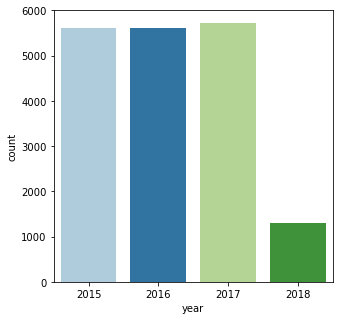

In [23]:
plt.figure(figsize=(5,5))
sns.countplot(df['year'], palette ='Paired')
plt.show()

In [24]:
# total volumes sold each year
yearly_sales = df.groupby('year')['Total Volume'].sum()

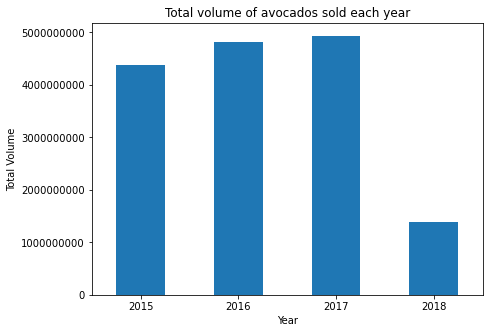

In [25]:
plt.ticklabel_format(useOffset=False, style='plain', axis='y')
yearly_sales.plot(kind='bar', figsize=(7,5), 
                  title='Total volume of avocados sold each year',
                  xlabel='Year', ylabel='Total Volume')
plt.xticks(rotation=360)
plt.show()

The amount of avocados sold increased every year from 2015 to 2017, but decreased significantly by 2018

# Modelling

In [26]:
# feature selection

new_df=pd.DataFrame(df[['AveragePrice', '4046', '4225',
             '4770', 'Small Bags', 'Large Bags', 
             'XLarge Bags', 'type','region']])

In [27]:
new_df.shape

(18249, 9)

In [28]:
# format categorical data
le = LabelEncoder()
new_df['type']= le.fit_transform(new_df['type'])

In [29]:
new_df = pd.get_dummies(new_df, columns=['region'])
new_df

,AveragePrice,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,region_Albany,region_Atlanta,...,region_SouthCarolina,region_SouthCentral,region_Southeast,region_Spokane,region_StLouis,region_Syracuse,region_Tampa,region_TotalUS,region_West,region_WestTexNewMexico
0,1.33,1036.74,54454.85,48.16,8603.62,93.25,0.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1.35,674.28,44638.81,58.33,9408.07,97.49,0.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0.93,794.70,109149.67,130.50,8042.21,103.14,0.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,1.08,1132.00,71976.41,72.58,5677.40,133.76,0.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,1.28,941.48,43838.39,75.78,5986.26,197.69,0.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,2046.96,1529.20,0.00,13066.82,431.85,0.0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
18245,1.71,1191.70,3431.50,0.00,8940.04,324.80,0.0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
18246,1.87,1191.92,2452.79,727.94,9351.80,42.31,0.0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
18247,1.93,1527.63,2981.04,727.01,10919.54,50.00,0.0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [30]:
new_df.isnull().sum()

AveragePrice               0
4046                       0
4225                       0
4770                       0
Small Bags                 0
                          ..
region_Syracuse            0
region_Tampa               0
region_TotalUS             0
region_West                0
region_WestTexNewMexico    0
Length: 62, dtype: int64

In [31]:
# import sklearn modules

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [32]:
# select independet feature and dependent feature
X = new_df.drop(['AveragePrice'], axis=1)
y = new_df['AveragePrice']

In [33]:
# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [34]:
# Linear Regression

lr =LinearRegression()
lr.fit(X_train, y_train)
preds = lr.predict(X_test)

print('Mean Squared Error => {mse}'.format(mse=(round(mean_squared_error(y_test, preds),2))))
print('Model Accuracy => {r2}'.format(r2=round(r2_score(y_test,preds)*100, 2)))

# Mean Squared Error => 0.08
# Model Accuracy => 15.06

Mean Squared Error => 0.08
Model Accuracy => 53.32


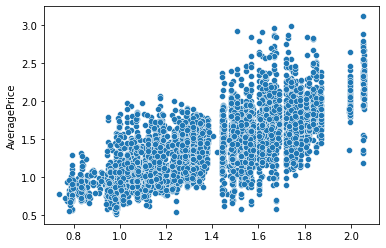

In [35]:
# plot linear regression resuls
sns.scatterplot(preds, y_test)
plt.show()

In [36]:
# Decision Tree Regressor

dt =DecisionTreeRegressor()
dt.fit(X_train, y_train)
preds2 = dt.predict(X_test)

print('Mean Squared Error => {mse}'.format(mse=(round(mean_squared_error(y_test, preds2),2))))
print('Model Accuracy => {r2}'.format(r2=round(r2_score(y_test,preds2)*100, 2)))

# Mean Squared Error => 0.07
# Model Accuracy => 25.43

Mean Squared Error => 0.06
Model Accuracy => 64.27


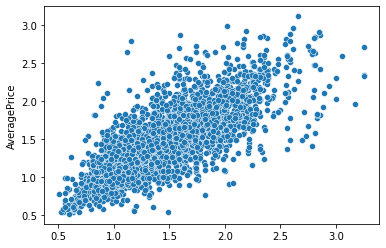

In [37]:
# plot Decision Tree Regressor resuls
sns.scatterplot(preds2, y_test)
plt.show()

In [38]:
preds2

array([1.78, 0.97, 1.37, ..., 1.44, 1.34, 1.3 ])

Conclusion:

The decison tree regressor model with a higher R2 score and a lower MSE performed better than the linear regression model